In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [11]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [12]:
print(cancer.target_names)

['malignant' 'benign']


In [13]:
df.shape

(569, 31)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

### Visualizing The Data

In [15]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

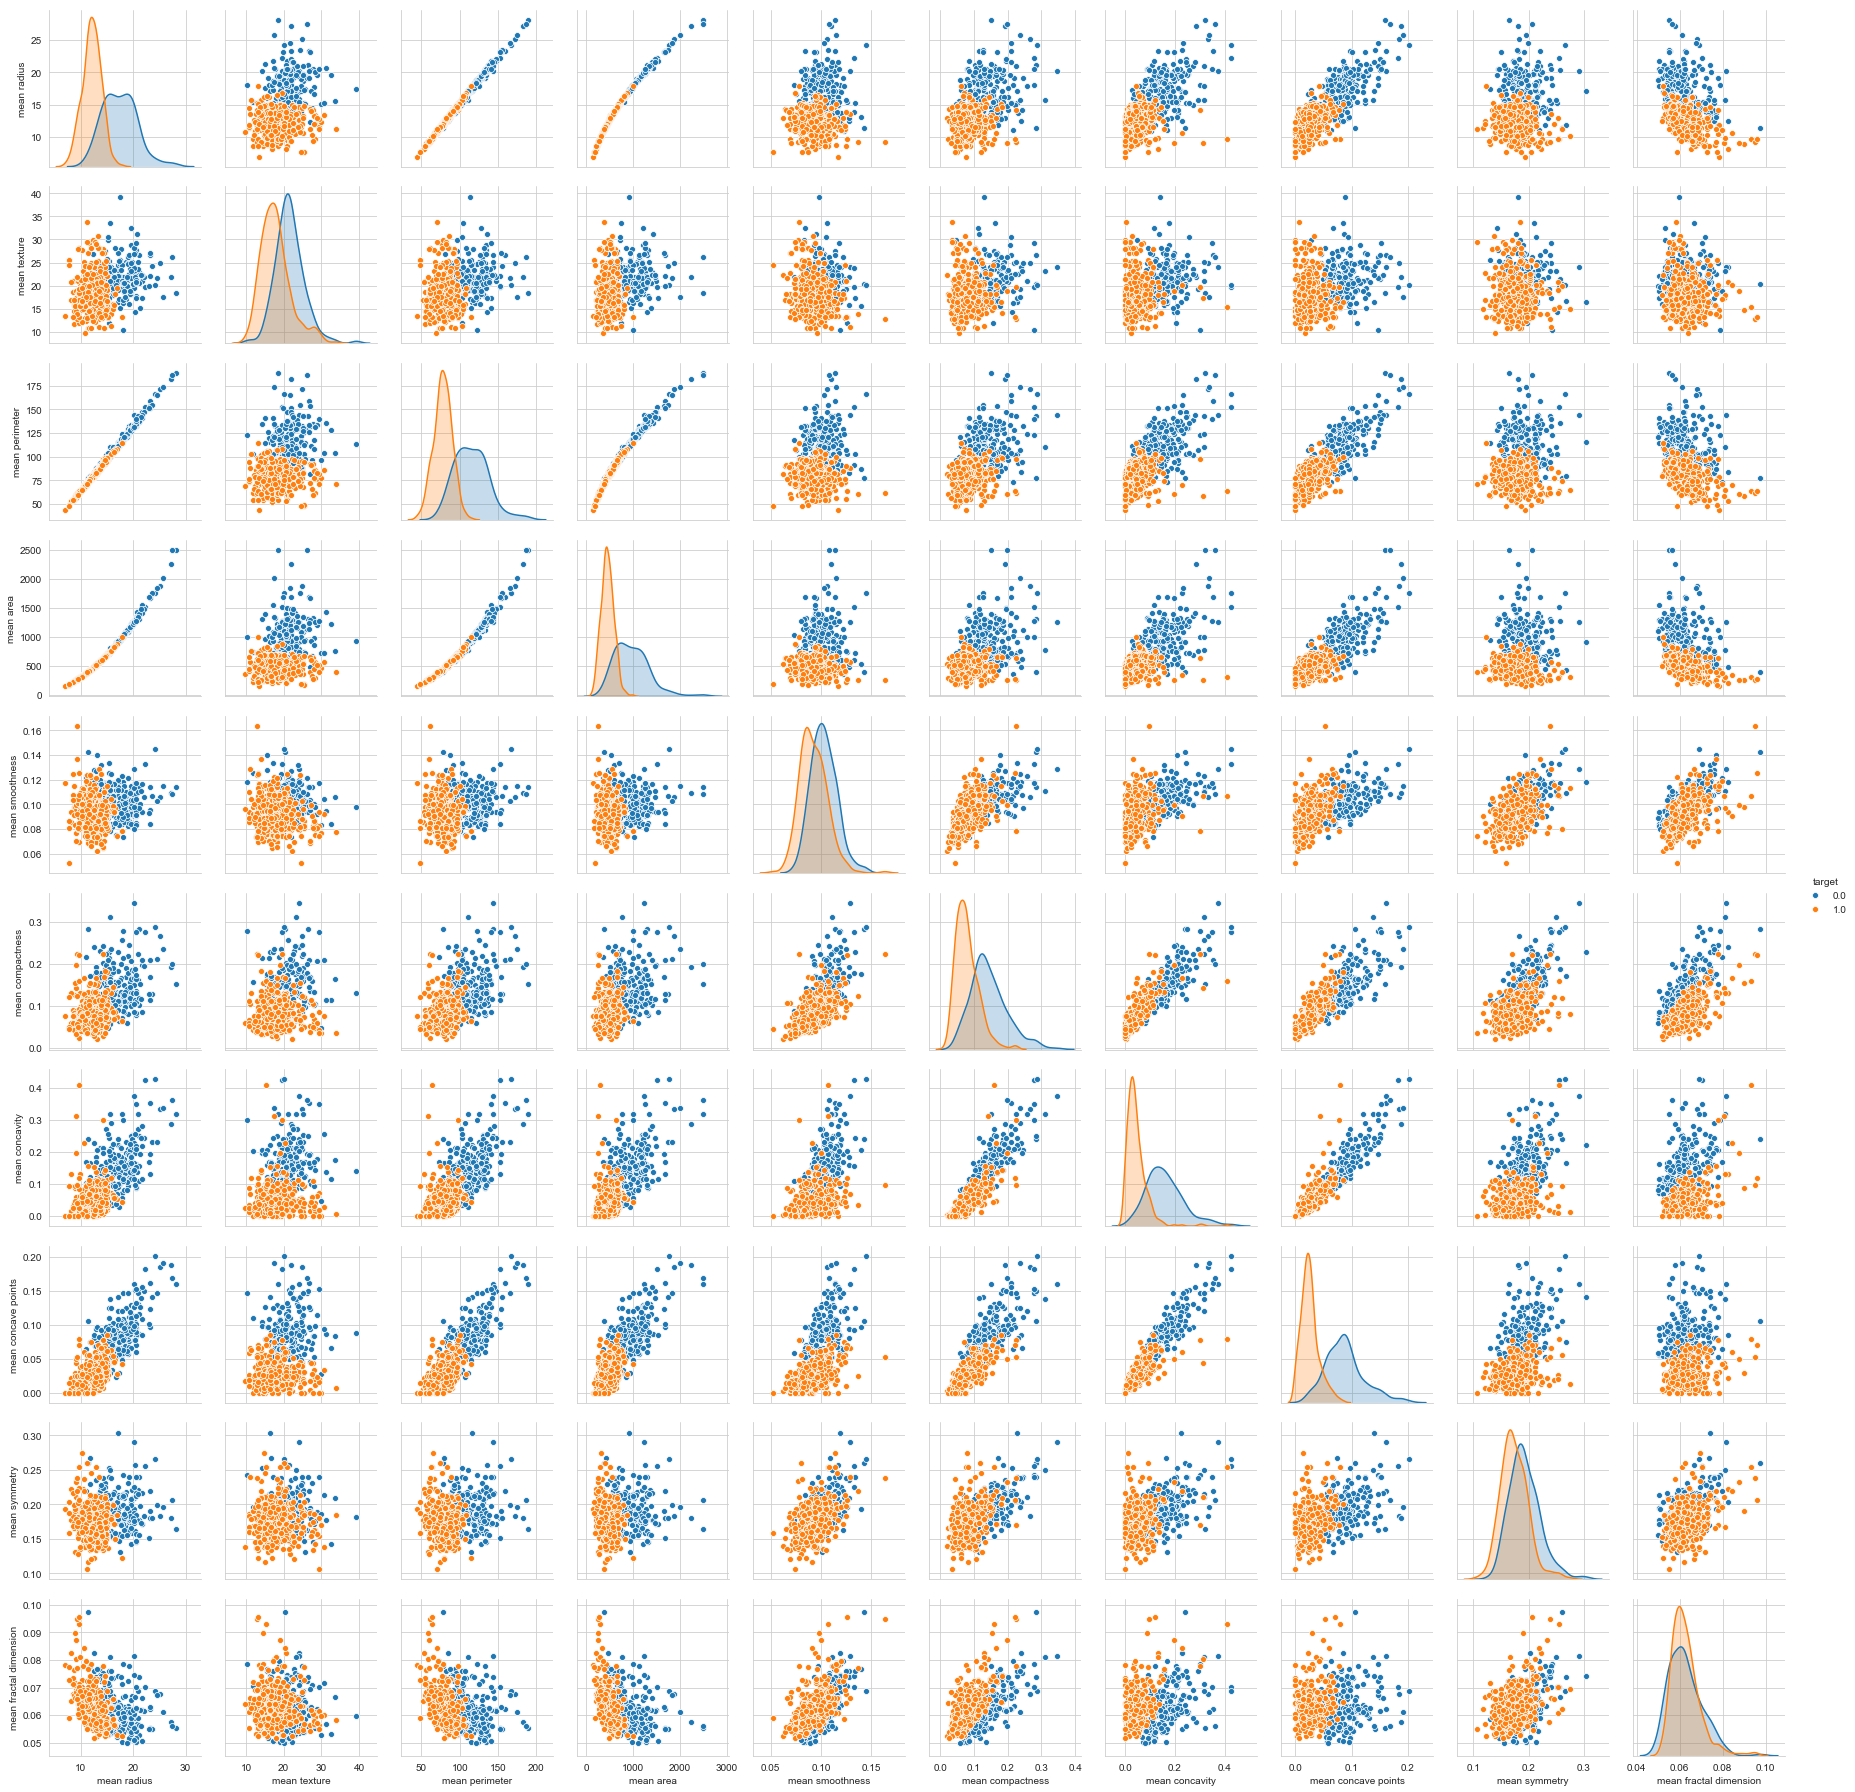

In [18]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                                    'mean smoothness', 'mean compactness', 'mean concavity',
                                    'mean concave points', 'mean symmetry', 'mean fractal dimension'])

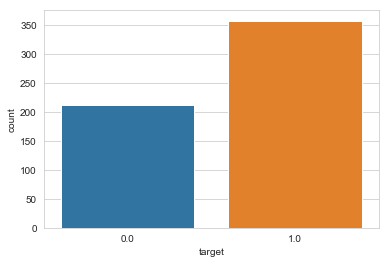

In [19]:
sns.countplot(df['target'], label='Count')

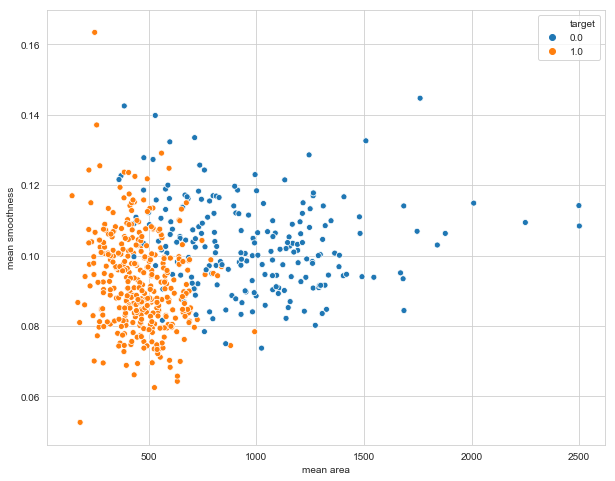

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df)

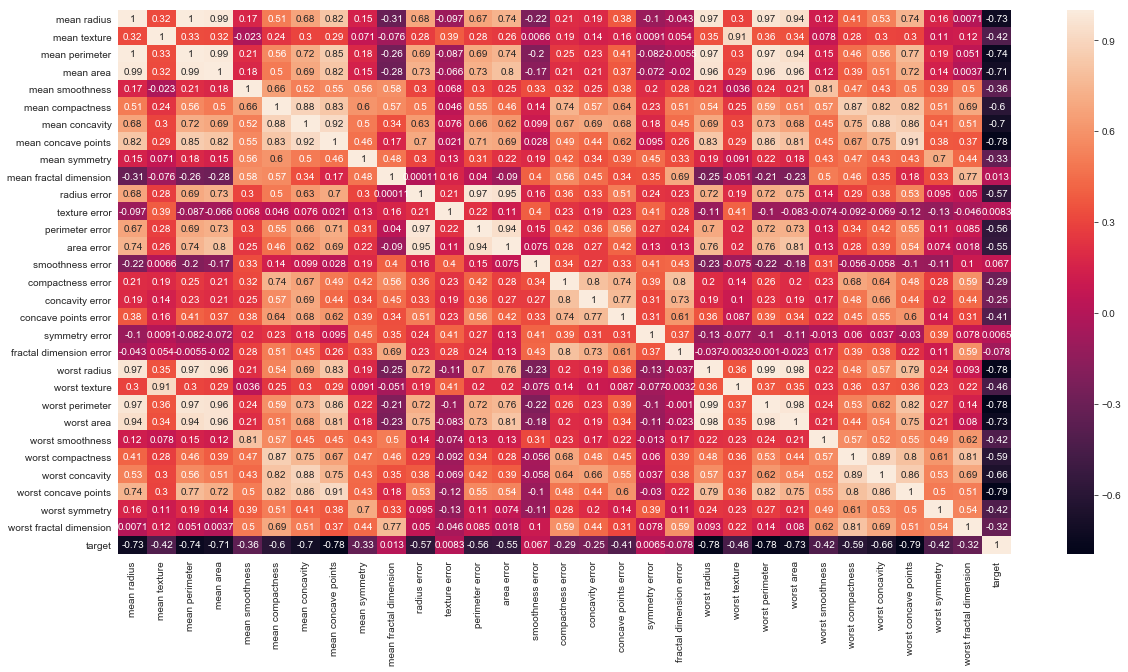

In [23]:
# Let's check the correlation between the variables
# Strong correlation between the mean radius and mean perimeter, mean area and mean perimeter
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

### Model Training
#### Finding a problem solution

In [24]:
X = df.drop('target', axis=1)
y = df.target

In [25]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)} \
        \n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)} \
        \n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")     

In [28]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

### Support Vector Machines
- C parameter: controlls trade-off between classifying training points correctly and having a smooth decision boundary
    - Small C (loose) makes cost (penalty) of misclassification low (soft margin)
    - Large C (strict) makes cost of misclassification high (hard margin), forcing the model to exlain input data stricter and potentially over it.
- Gamma parameter: controlls how far the inflence of a single training set reaches
    - Large gamma: close reach (closer data oints have high weight)
    - Small gamma: far reach (more generalized solution)
- Degree parameter: degree of the polynoimal kernel function ('poly'). Ignored by all other kernels.

#### Linear Kernal SVM

In [30]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.9598

Classification Report: 
 	Precision: 0.9565217391304348         
	Recall Score: 0.979757085020243
	F1 score: 0.9680000000000001

Confusion Matrix: 
 [[140  11]
 [  5 242]]

Test Result:
accuracy score: 0.9824561403508771

Classification Report: 
 	Precision: 0.9908256880733946         
	Recall Score: 0.9818181818181818
	F1 score: 0.9863013698630138

Confusion Matrix: 
 [[ 60   1]
 [  2 108]]



#### Polynomial Kernel SVM

In [32]:
model_poly = SVC(kernel='poly', degree=2, gamma='auto')
model_poly.fit(X_train, y_train)

print_score(model_poly, X_train, y_train, X_test, y_test, train=True)
print_score(model_poly, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.9874

Classification Report: 
 	Precision: 0.9879032258064516         
	Recall Score: 0.9919028340080972
	F1 score: 0.98989898989899

Confusion Matrix: 
 [[148   3]
 [  2 245]]

Test Result:
accuracy score: 0.9707602339181286

Classification Report: 
 	Precision: 0.9565217391304348         
	Recall Score: 1.0
	F1 score: 0.9777777777777777

Confusion Matrix: 
 [[ 56   5]
 [  0 110]]



#### Radial Kernel SVM

In [34]:
model_radial = SVC(kernel='rbf', gamma=1)
model_radial.fit(X_train, y_train)

print_score(model_radial, X_train, y_train, X_test, y_test, train=True)
print_score(model_radial, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0         
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[151   0]
 [  0 247]]

Test Result:
accuracy score: 0.6432748538011696

Classification Report: 
 	Precision: 0.6432748538011696         
	Recall Score: 1.0
	F1 score: 0.7829181494661921

Confusion Matrix: 
 [[  0  61]
 [  0 110]]



### Data Preparation for SVM
- Numerical Inputs: SVM assumes that your inputs are numeric. If you have categorical inputs you may need to convert them to binary dummy variables (one variable for each category).
- Binary Classification: Basic SVM as described in this point is inteded for binary (two-class) classification problems. Although, extensions have been developed for regression and multi-class classification.

In [37]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_std = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=5)

In [39]:
print("=========================Linear Kernal SVM==========================")
model_lin = SVC(kernel='linear')
model_lin.fit(X_train, y_train)

print_score(model_lin, X_train, y_train, X_test, y_test, train=True)
print_score(model_lin, X_train, y_train, X_test, y_test, train=False)

print("=======================Polynomial Kernel SVM==========================")

model_poly = SVC(kernel='poly', degree=2, gamma='auto')
model_poly.fit(X_train, y_train)

print_score(model_poly, X_train, y_train, X_test, y_test, train=True)
print_score(model_poly, X_train, y_train, X_test, y_test, train=False)

print("=======================Radial Kernel SVM==========================")
model_radial = SVC(kernel='rbf', gamma=1)
model_radial.fit(X_train, y_train)

print_score(model_radial, X_train, y_train, X_test, y_test, train=True)
print_score(model_radial, X_train, y_train, X_test, y_test, train=False)

=========================Linear Kernal SVM==========================
Train Result:
accuracy score: 0.9774

Classification Report: 
 	Precision: 0.9722222222222222         
	Recall Score: 0.9919028340080972
	F1 score: 0.9819639278557114

Confusion Matrix: 
 [[144   7]
 [  2 245]]

Test Result:
accuracy score: 0.9883040935672515

Classification Report: 
 	Precision: 0.9821428571428571         
	Recall Score: 1.0
	F1 score: 0.9909909909909909

Confusion Matrix: 
 [[ 59   2]
 [  0 110]]

=======================Polynomial Kernel SVM==========================
Train Result:
accuracy score: 0.7814

Classification Report: 
 	Precision: 0.7395209580838323         
	Recall Score: 1.0
	F1 score: 0.8502581755593803

Confusion Matrix: 
 [[ 64  87]
 [  0 247]]

Test Result:
accuracy score: 0.8538011695906432

Classification Report: 
 	Precision: 0.8148148148148148         
	Recall Score: 1.0
	F1 score: 0.8979591836734693

Confusion Matrix: 
 [[ 36  25]
 [  0 110]]

=======================Radial Kerne

### Support Vector Machine Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100],
             'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
             'kernel': ['rbf', 'poly', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, iid=True)

grid.fit(X_train, y_train)

print_score(grid, X_train, y_train, X_test, y_test, train=True)
print_score(grid, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Result:
accuracy score: 0.9824

Classification Report: 
 	Precision: 0.9761904761904762         
	Recall Score: 0.9959514170040485
	F1 score: 0.9859719438877755

Confusion Matrix: 
 [[145   6]
 [  1 246]]

Test Result:
accuracy score: 0.9883040935672515

Classification Report: 
 	Precision: 0.9821428571428571         
	Recall Score: 1.0
	F1 score: 0.9909909909909909

Confusion Matrix: 
 [[ 59   2]
 [  0 110]]



[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    5.1s finished


### Principal Component Analysis
PCA is:
    - Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional spcae.
    - Unsupervised Machinee Learning
    - A transformation of your data and attempts to find out what features explain the most variance in your data.

In [41]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


#### PCA Visualization

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop('target', axis=1))
scaled_data = scaler.transform(df.drop('target', axis=1))

In [44]:
pd.DataFrame(scaled_data)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [45]:
# We can also speicify how many components we want to keep when creating the PCA object
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [46]:
pd.DataFrame(x_pca)

,0,1,2
0,9.192837,1.948583,-1.123167
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389766
5,2.380247,3.949929,-2.934877
6,2.238883,-2.690031,-1.639913
7,2.143299,2.340244,-0.871947
8,3.174924,3.391813,-3.119986
9,6.351747,7.727174,-4.341916


Text(0, 0.5, 'Second Principal Component')

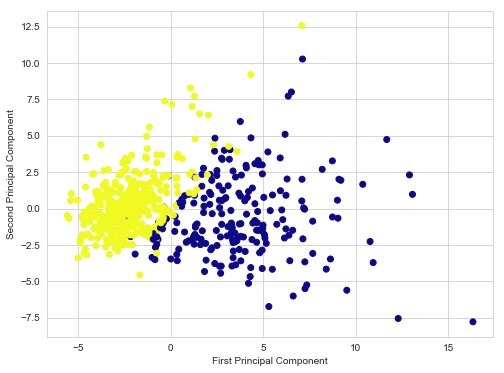

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df['target'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

#### Interpreting the Components

unfortunately, with this great power of dimensionality reduction, comes the costs of being able to easily understand what these components represent. 

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

Note:
Principal Component Anlysis:
    - used in exploratory data anlysis (EDA)
    - Visualize genetic distance and relatedness between populations.
    - Method:
        - Eigenvalue decomposition of a data covariance (or correlation) matrix
        - singular value decomposition of a data matrix (After mean centering / normalizing) the data matrix for each attribute.
    - Output
        - Component scores, sometimes called factor scores (the transformed variable values)
        - loadings (the weight)
    - Data compression and information preservation
    - Visualization
    - Noise filtering
    - Feature extraction and engineering

In [49]:
X = x_pca
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, iid=True)

grid.fit(X_train, y_train)

print_score(grid, X_train, y_train, X_test, y_test, train=True)
print_score(grid, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Result:
accuracy score: 0.9598

Classification Report: 
 	Precision: 0.9565217391304348         
	Recall Score: 0.979757085020243
	F1 score: 0.9680000000000001

Confusion Matrix: 
 [[140  11]
 [  5 242]]

Test Result:
accuracy score: 0.9766081871345029

Classification Report: 
 	Precision: 0.9649122807017544         
	Recall Score: 1.0
	F1 score: 0.9821428571428572

Confusion Matrix: 
 [[ 57   4]
 [  0 110]]



[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:   39.8s finished
